In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import random
import os
from tqdm import tqdm
from torch.utils.data import Subset,  ConcatDataset
from torchvision.utils import save_image, make_grid
from tqdm import tqdm
from torch.optim import Adam
import math
from torchvision.datasets import MNIST, CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor, Pad, Resize, Grayscale, RandomHorizontalFlip, RandomRotation
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision.datasets import ImageFolder
import torch.nn.init as init

In [22]:
# Path to the dataset
dataset_path = './datasets'
# Specify the dataset to be used
dataset = 'CIFAR10'
batch_size = 64

In [23]:
if dataset == 'MNIST':
    transform = Compose([
        ToTensor(),         
        Pad(2),             # Aggiunge 2 pixel di padding a ogni lato
    ])
elif dataset == 'CIFAR10':
    transform = Compose([
        ToTensor(),      
    ])
elif dataset == 'FLOWER':
    transform = Compose([
        Resize((32, 32)),
        ToTensor()          
    ])

In [24]:
# Load CIFAR10 or MNIST dataset based on the selected option
if dataset == 'CIFAR10':
    train_dataset = CIFAR10(dataset_path, transform=transform, train=True, download=True)
    test_dataset = CIFAR10(dataset_path, transform=transform, train=False, download=True)
elif dataset == 'MNIST':
    train_dataset = MNIST(dataset_path, transform=transform, train=True, download=True)
    test_dataset  = MNIST(dataset_path, transform=transform, train=False, download=True)
elif dataset == 'FLOWER':
    train_dataset = ImageFolder(root=dataset_path + "/flower/train", transform=transform)
    test_dataset = ImageFolder(root=dataset_path + "/flower/test", transform=transform)

full_dataset = ConcatDataset([train_dataset, test_dataset])
data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


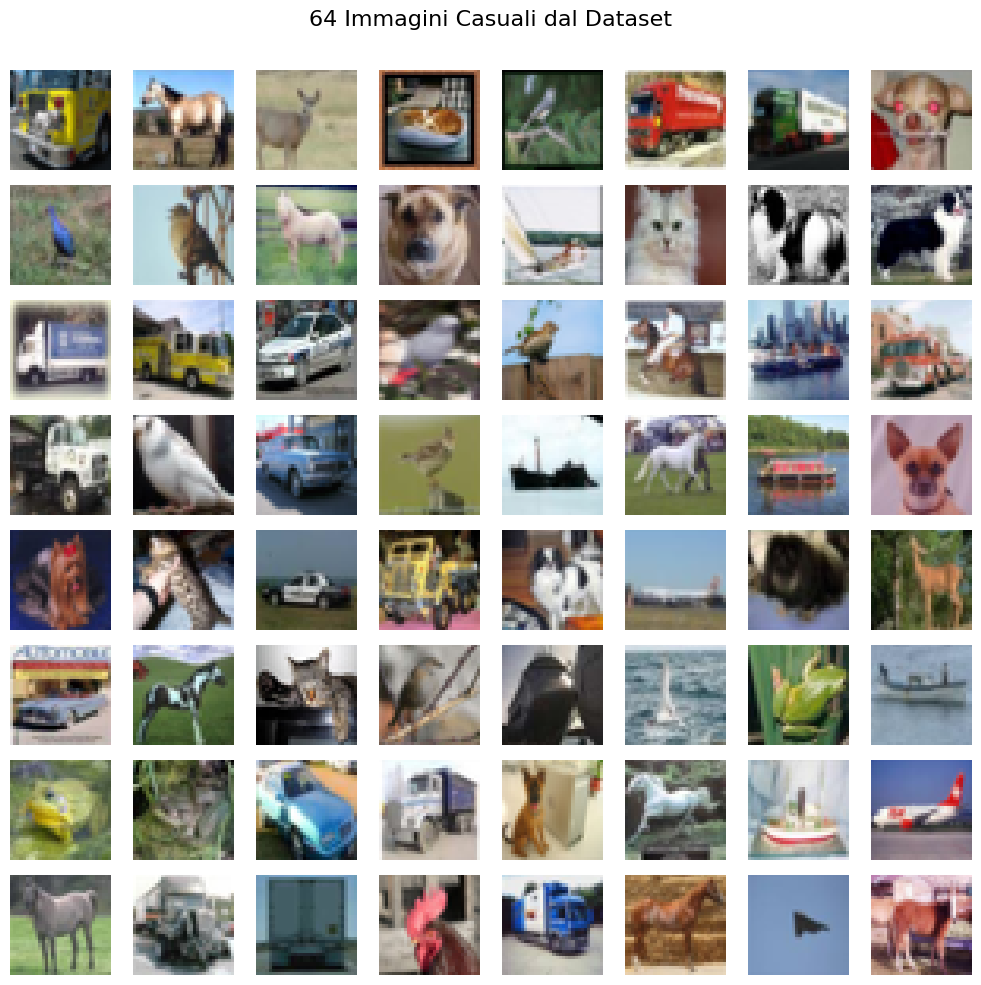

In [25]:
# Ottenere un batch di immagini casuali
images, labels = next(iter(data_loader))

# Configurare la griglia 8x8
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.suptitle("64 Immagini Casuali dal Dataset", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < len(images):
        # Convertire il tensor dell'immagine in un formato visualizzabile
        img = images[i].permute(1, 2, 0).numpy()  # Cambiare dimensioni da (C, H, W) a (H, W, C)
        ax.imshow(img, interpolation='nearest')
        ax.axis('off')
    else:
        ax.axis('off')  # Nascondere gli assi per celle vuote

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()
